# Import LIbraries 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, levene, kruskal

# Prepare Data

## Import 

In [26]:
df = pd.read_csv("WA_Marketing-Campaign(AB-Test).csv")

In [27]:
def check_df(dataframe , head = 5):
    print("*****************Shape*****************")
    print()
    print(dataframe.shape)
    print()
    print("*****************Data Types*****************")
    print()
    print(dataframe.dtypes)
    print()
    print("*****************Null Values*****************")
    print()
    print(dataframe.isnull().sum())
    print()
    print("*****************Quntiles*****************")
    print()
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)
    print()
    print("*****************Head*****************")
    print()
    return dataframe.head(head)

In [28]:
check_df(df,head=5)

*****************Shape*****************

(548, 7)

*****************Data Types*****************

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

*****************Null Values*****************

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

*****************Quntiles*****************

                  count        mean         std    min     0%       5%    50%  \
MarketID          548.0    5.715328    2.877001   1.00   1.00   1.0000    6.0   
LocationID        548.0  479.656934  287.973679   1.00   1.00   7.3500  504.0   
AgeOfStore        548.0    8.503650    6.638345   1.00   1.00   1.0000    7.0   
Promotion         548.0    2.029197    0.810729   1.00   1.00   1.0000    2.0   
week              548.0    2

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


## Explore

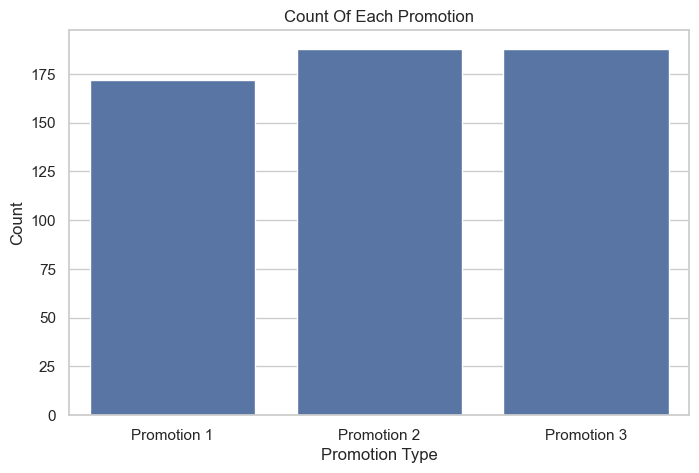

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x="Promotion",data = df)
plt.xlabel("Promotion Type")
plt.ylabel("Count")
plt.title("Count Of Each Promotion")
plt.xticks(ticks=[0,1,2],labels=['Promotion 1', 'Promotion 2', 'Promotion 3'])
plt.show()

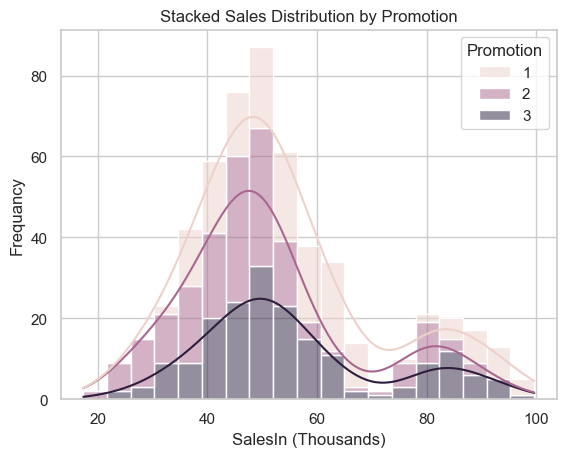

In [30]:
sns.histplot(data=df, x="SalesInThousands", hue = "Promotion",multiple='stack',kde=True)
plt.title("Stacked Sales Distribution by Promotion")
plt.xlabel("SalesIn (Thousands)")
plt.ylabel("Frequancy");

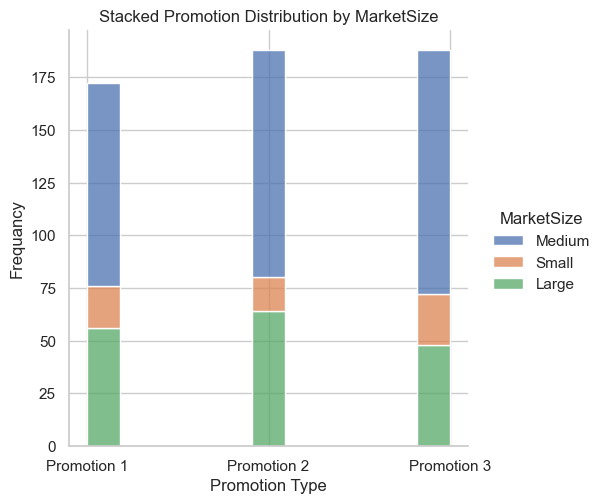

In [31]:
sns.displot(data=df , x= "Promotion" , hue ="MarketSize", multiple='stack')
plt.title("Stacked Promotion Distribution by MarketSize")
plt.xlabel("Promotion Type")
plt.ylabel("Frequancy")
plt.xticks(ticks=[1,2,3],labels=['Promotion 1', 'Promotion 2', 'Promotion 3']);

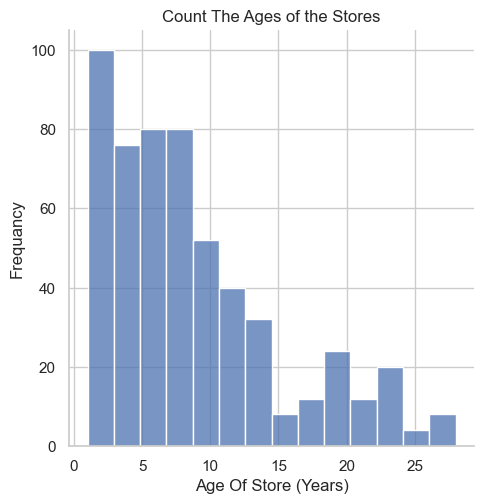

In [32]:
sns.displot(data=df , x= "AgeOfStore")
plt.title("Count The Ages of the Stores")
plt.xlabel("Age Of Store (Years)")
plt.ylabel("Frequancy");

Text(46.649645833333324, 0.5, 'Sales In (Thousands)')

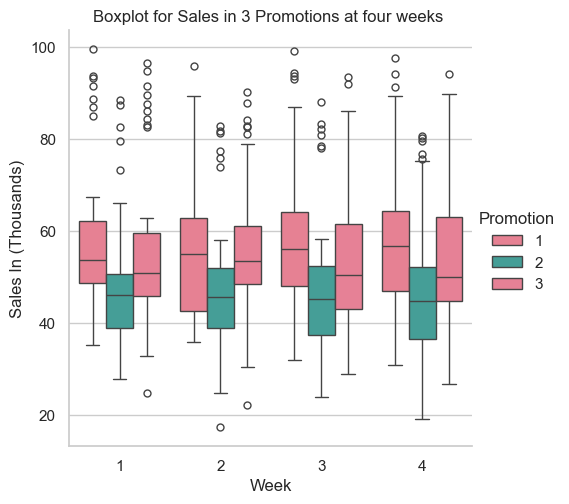

In [33]:
sns.catplot(data=df, x="week", y="SalesInThousands", hue="Promotion", kind="box", palette="husl")
plt.title("Boxplot for Sales in 3 Promotions at four weeks ")
plt.xlabel("Week")
plt.ylabel("Sales In (Thousands)")

In [34]:
def remove_outliers(dataframe, colmn, promo_type):
    df = dataframe[dataframe["Promotion"] == promo_type]
    Q1 = df[colmn].quantile(0.25)
    Q3 = df[colmn].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Corrected: Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  # Corrected: Q3 + 1.5 * IQR
    return df[(df[colmn] >= lower_bound) & (df[colmn] <= upper_bound)]


In [35]:
clean_P1 = remove_outliers(dataframe=df, colmn="SalesInThousands", promo_type=1)
print(clean_P1.shape)  # Accessing the shape attribute without parentheses

(160, 7)


In [36]:
clean_P2 = remove_outliers(dataframe=df, colmn="SalesInThousands", promo_type=2)

In [37]:
clean_P3 = remove_outliers(dataframe=df, colmn="SalesInThousands", promo_type=3)

In [38]:
df_clean = pd.concat([clean_P1,clean_P2,clean_P3],ignore_index=True)
df_clean.reset_index(drop=True,inplace=True)
df_clean

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,3,12,1,1,44.54
1,1,Medium,3,12,1,2,37.94
2,1,Medium,3,12,1,3,45.49
3,1,Medium,3,12,1,4,34.75
4,1,Medium,7,15,1,1,42.92
...,...,...,...,...,...,...,...
497,10,Large,905,2,3,4,58.33
498,10,Large,917,14,3,1,53.50
499,10,Large,917,14,3,2,56.34
500,10,Large,917,14,3,3,51.83


In [39]:
df_clean.shape

(502, 7)

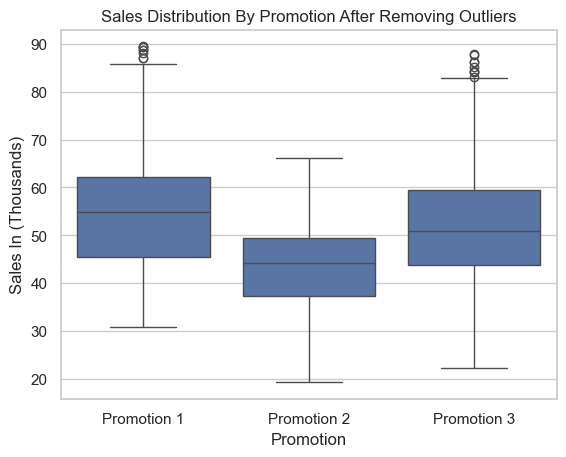

In [40]:
sns.boxplot(x="Promotion",y="SalesInThousands",data=df_clean)
plt.title("Sales Distribution By Promotion After Removing Outliers")
plt.xlabel("Promotion")
plt.ylabel("Sales In (Thousands)")
plt.xticks(ticks=[0,1,2],labels=['Promotion 1', 'Promotion 2', 'Promotion 3']);

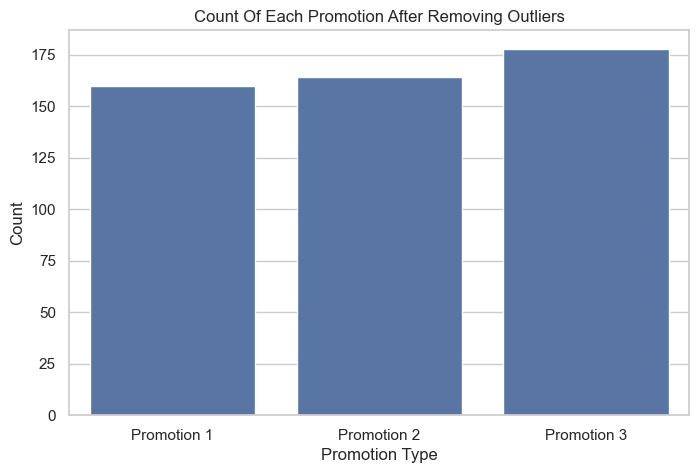

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(x="Promotion",data = df_clean)
plt.xlabel("Promotion Type")
plt.ylabel("Count")
plt.title("Count Of Each Promotion After Removing Outliers")
plt.xticks(ticks=[0,1,2],labels=['Promotion 1', 'Promotion 2', 'Promotion 3'])
plt.show()

C:\Users\omar1\anaconda3 2\Lib\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


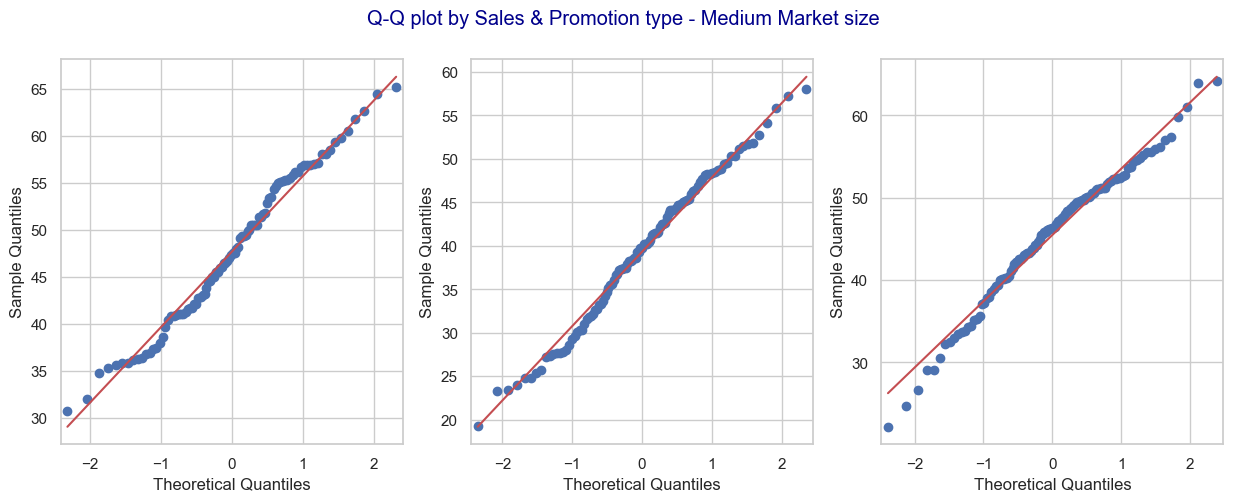

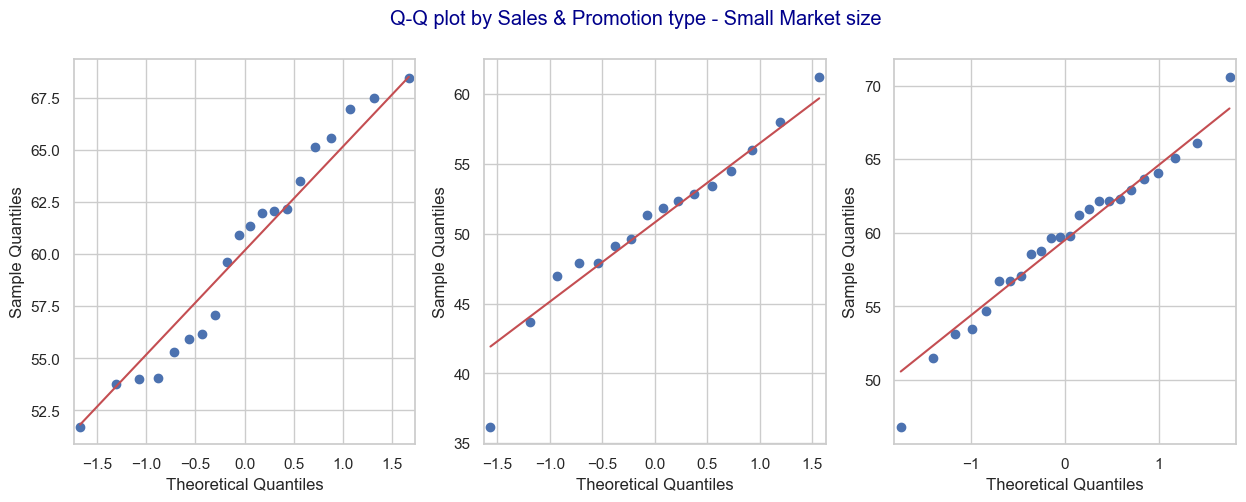

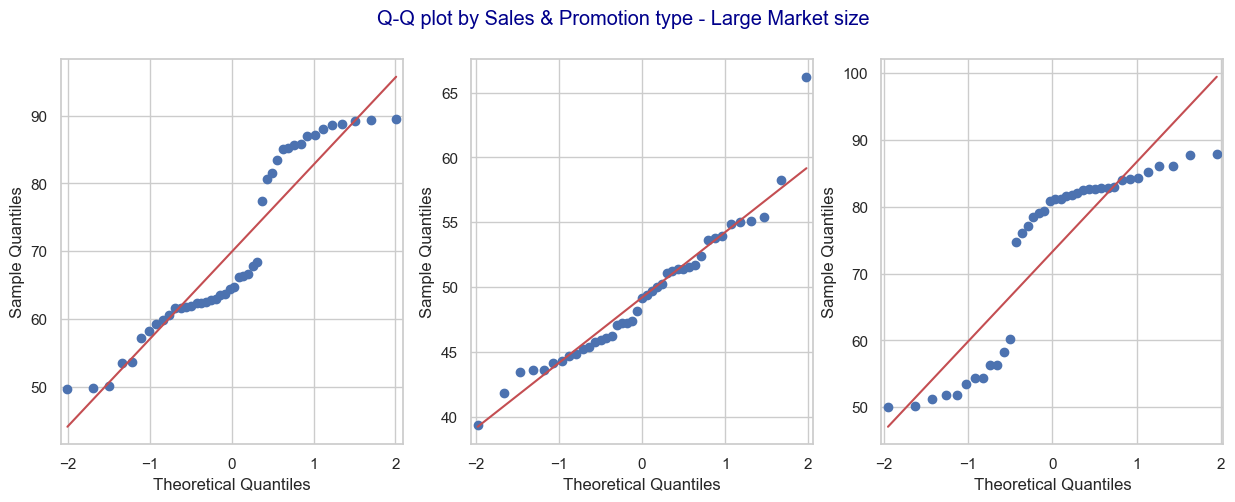

In [42]:
sns.set(style="whitegrid")
market_size = df_clean["MarketSize"].unique()
colors = sns.color_palette("husl", 3)
for market in market_size:
    fig, ax = plt.subplots(1,3,figsize=(15,5))
    fig.suptitle(f"Q-Q plot by Sales & Promotion type - {market} Market size",color="darkblue")
    qqplot(
        df_clean[(df_clean['Promotion'] == 1) & (df_clean['MarketSize']== market)]['SalesInThousands'],
        line="s",
        ax=ax[0],
        color=colors[0]
          )
    qqplot(
        df_clean[(df_clean['Promotion'] == 2) & (df_clean['MarketSize']== market)]['SalesInThousands'],
        line="s",
        ax=ax[1],
        color=colors[1]
          )
    qqplot(
        df_clean[(df_clean['Promotion'] == 3) & (df_clean['MarketSize']== market)]['SalesInThousands'],
        line="s",
        ax=ax[2],
        color=colors[0]
          );

In [43]:
df_clean.groupby("Promotion").agg({"SalesInThousands":["count","mean","std","median"]})

SalesInThousands                              
                     count       mean        std  median
Promotion                                               
1                      160  55.345187  13.594556  54.825
2                      164  42.906098   9.057592  44.300
3                      178  53.297978  14.694229  50.975

In [44]:
df_clean.groupby(["Promotion","MarketSize"]).agg({"SalesInThousands":["count","mean","std","median"]})

SalesInThousands                              
                                count       mean        std  median
Promotion MarketSize                                               
1         Large                    44  69.895682  13.004280  64.500
          Medium                   96  47.672604   8.067331  47.425
          Small                    20  60.162500   5.127279  61.145
2         Large                    41  49.185854   5.098969  49.160
          Medium                  107  39.317850   8.589968  39.800
          Small                    16  50.810625   5.869816  51.600
3         Large                    38  73.271316  13.623107  80.990
          Medium                  116  45.468879   8.091366  46.295
          Small                    24  59.514167   5.212687  59.745

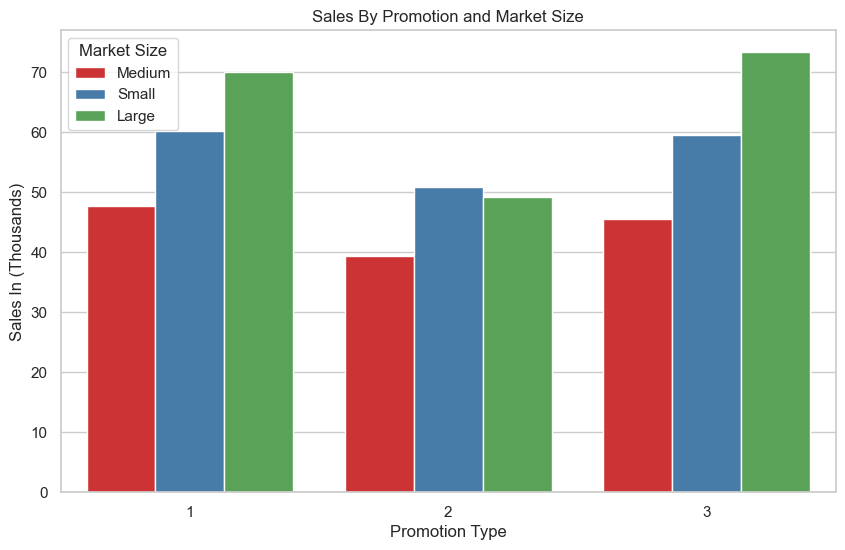

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean,x="Promotion",y="SalesInThousands",hue="MarketSize",errorbar=None, palette="Set1")
plt.title("Sales By Promotion and Market Size")
plt.xlabel("Promotion Type")
plt.ylabel("Sales In (Thousands)")
plt.legend(title="Market Size", loc = 'upper left')

# HYPOTHESIS

- H0: M1 = M2 = M3 => There is not a statistically significant difference between Sales of he Promotions
- H0: M1 =! M2 =! M3 => There is a statistically significant difference between Sales of he Promotions

# Checking Variance

## Testing Normality (Shapiro - Wilk Test)

- H0: The normality assumption is met.
- H1: The normality assumption is not met.

In [46]:
for i in list(df_clean["Promotion"].unique()):
    pvalue= shapiro(df.loc[df["Promotion"]==i , "SalesInThousands"])[1]
    print(i, 'p-value: %.4f' % pvalue )

1 p-value: 0.0000
2 p-value: 0.0000
3 p-value: 0.0000


Normally, when we reject the null hypothesis (H0) in a normality test, we can say that we will conduct a non-parametric test. However, let's also conduct a variance test to see the result.

## Variance Homogeneity (Levene)

- H0 = The variance homogeneity is met.
- H1 = The variance homogeneity is not met.

In [47]:
test_stat, pvalue = levene(df.loc[df["Promotion"]==1, "SalesInThousands"],
                            df.loc[df["Promotion"]==2, "SalesInThousands"],
                            df.loc[df["Promotion"]==3, "SalesInThousands"]
                           )
print("Test Stat = %.4f, p_value = %.4f" % (test_stat,pvalue))
# p-value > 0.05 ,Not Rejecting HO

Test Stat = 1.2697, p_value = 0.2818


## Non-parametric (Kruskal Wallis-H)

- H0: M1 = M2 = M3 -> There is not a statistically significant difference between Sales of he Promotions
- H1: M1 != M2 != M3 -> There is a statistically significant difference between Sales of he Promotions

In [52]:
test_stat, pvalue = kruskal(df.loc[df["Promotion"]==1, "SalesInThousands"],
                            df.loc[df["Promotion"]==2, "SalesInThousands"],
                            df.loc[df["Promotion"]==3, "SalesInThousands"]
                           )
print(f"Test Stat = {test_stat} , p_value = {pvalue}" )
print("pvalue: ", "%.4f" % pvalue)

Test Stat = 53.29475169322799 , p_value = 2.6741866266697816e-12
pvalue:  0.0000
